# Finch Carr - Lab 04
## Problem 1

In [2]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [4]:
hf.keys()

<KeysViewHDF5 ['data']>

In [5]:
data = np.array(hf.get('data'))

In [6]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [17]:
hf.close()

### Problem 1.1
- Now I have downloaded the data from the course website (gammaray_lab4.h5), and imported it into my working environment. The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. I want to make a few plots, generally exploring my data and make sure I understand it. I want to give a high level description of the data features I see as well. I want to specifically determine whether I see signal contamination in my data, and how I plan to build a background pdf().
  - What will my data look like if I plot every 10,000th time measurement (in gps seconds) on the x-axis and every 10,000th gamma-ray counts as my y-axis?

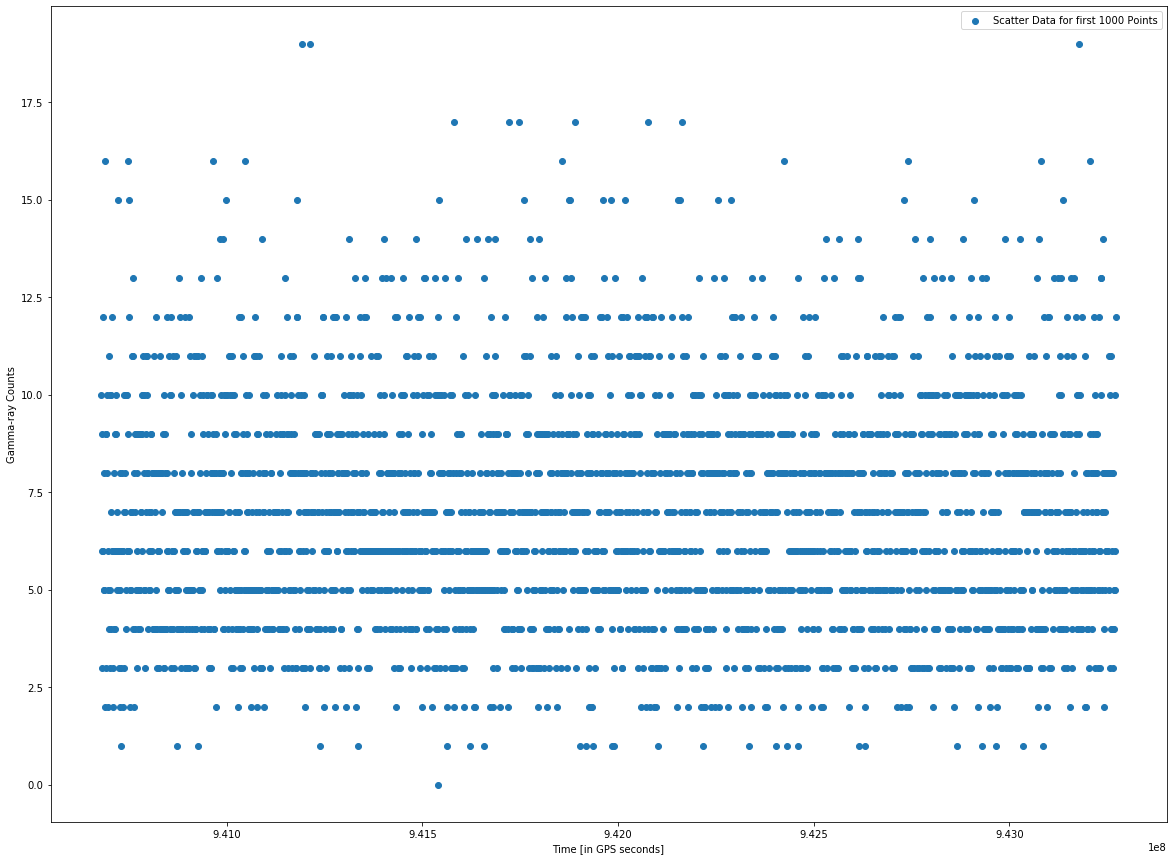

In [108]:
# Define the data points for every 10000 elements of 'data' array for the right columns
timeGPS = data[0,::10000]
gamma = data[3,::10000]

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(timeGPS, gamma, label='Scatter Data for first 1000 Points')
ax.legend(loc='best')
plt.xlabel('Time [in GPS seconds]')
plt.ylabel('Gamma-ray Counts')
plt.show()

- What if I plot the gamma ray count on the y-axis against the solar phase in degrees on the x-axis?

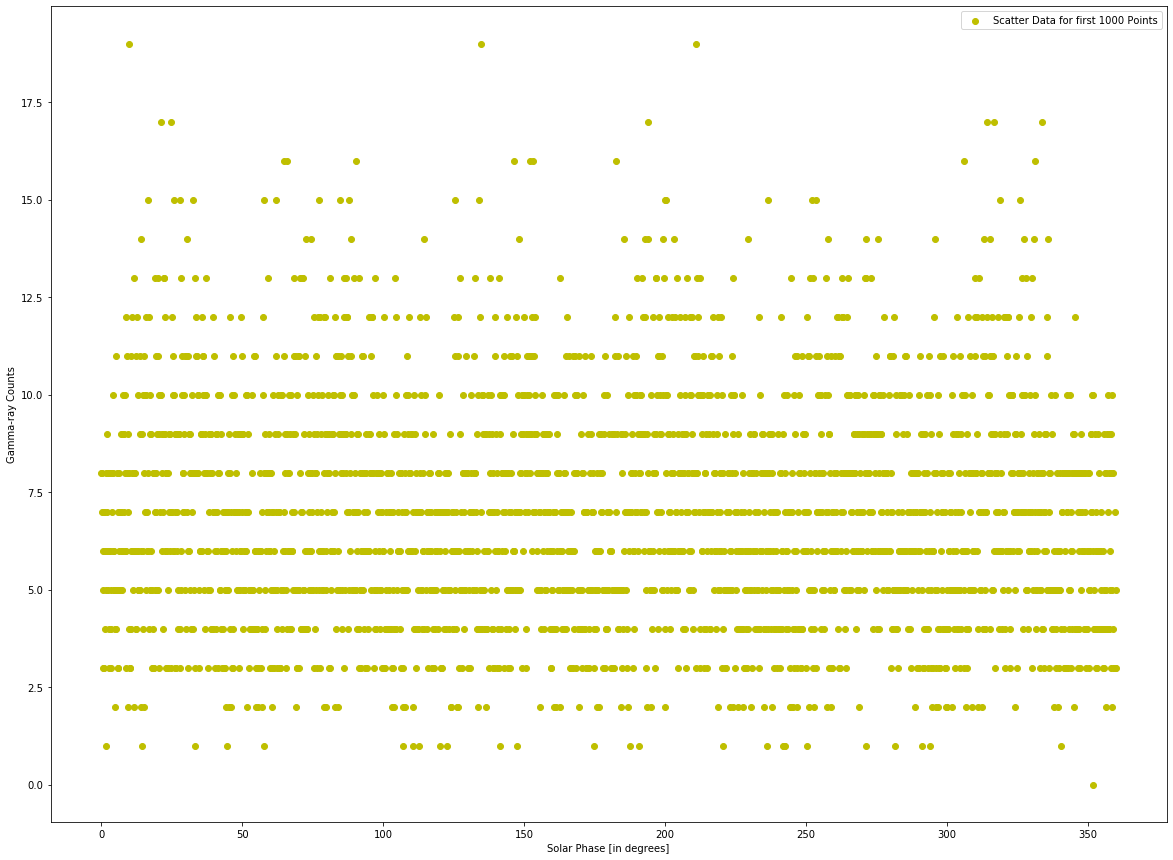

In [137]:
# Define the data points for every 10000 elements of 'data' array for the correct columns
solarphase = data[1,::10000]

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(solarphase, gamma, c='y', label='Scatter Data for first 1000 Points')
ax.legend(loc='best')
plt.xlabel('Solar Phase [in degrees]')
plt.ylabel('Gamma-ray Counts')
plt.show()

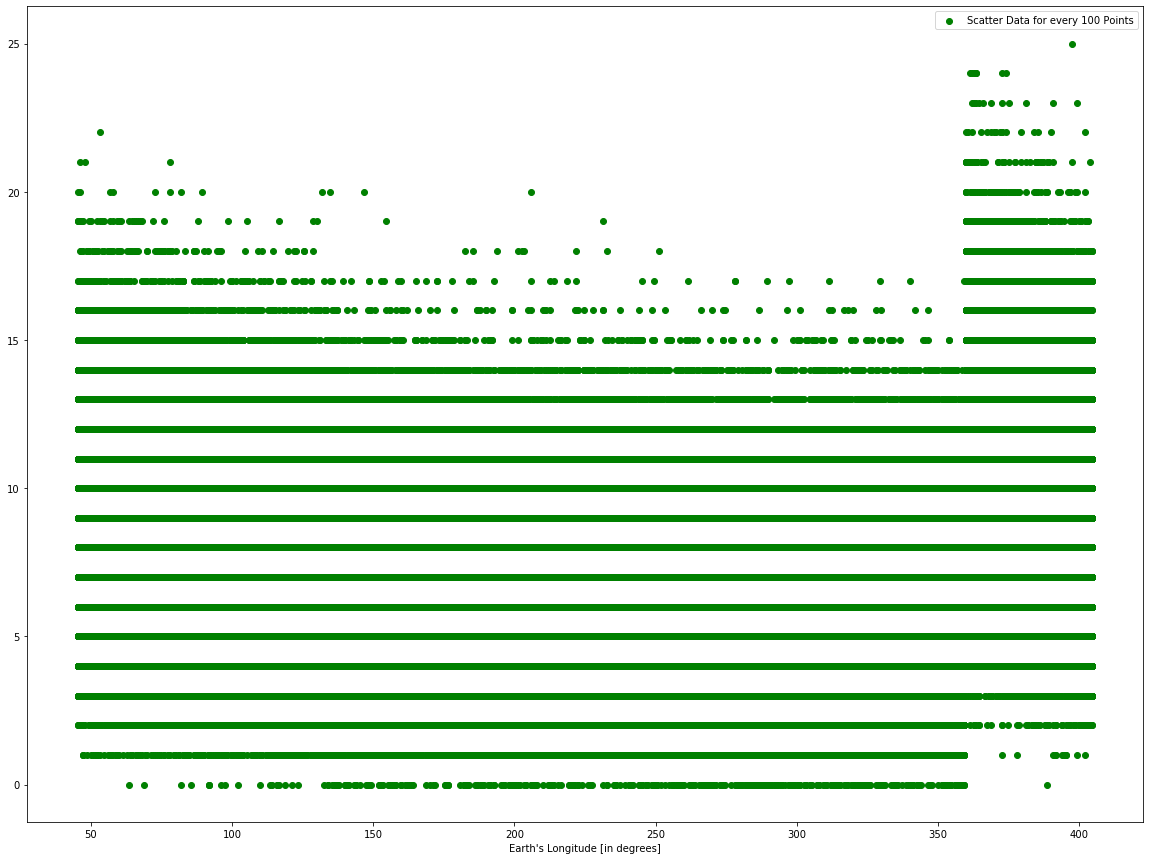

In [142]:
# Define the data points for every 1000 elements of 'data' array for the correct columns
longitude = data[2,::100]+45
y1000 = data[3,::100]
fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(longitude, y1000, c='g', label='Scatter Data for every 100 Points')
ax.legend(loc='best')
plt.xlabel('Earth\'s Longitude [in degrees]')
#plt.ylabel('Gamma-ray Counts')
plt.show()

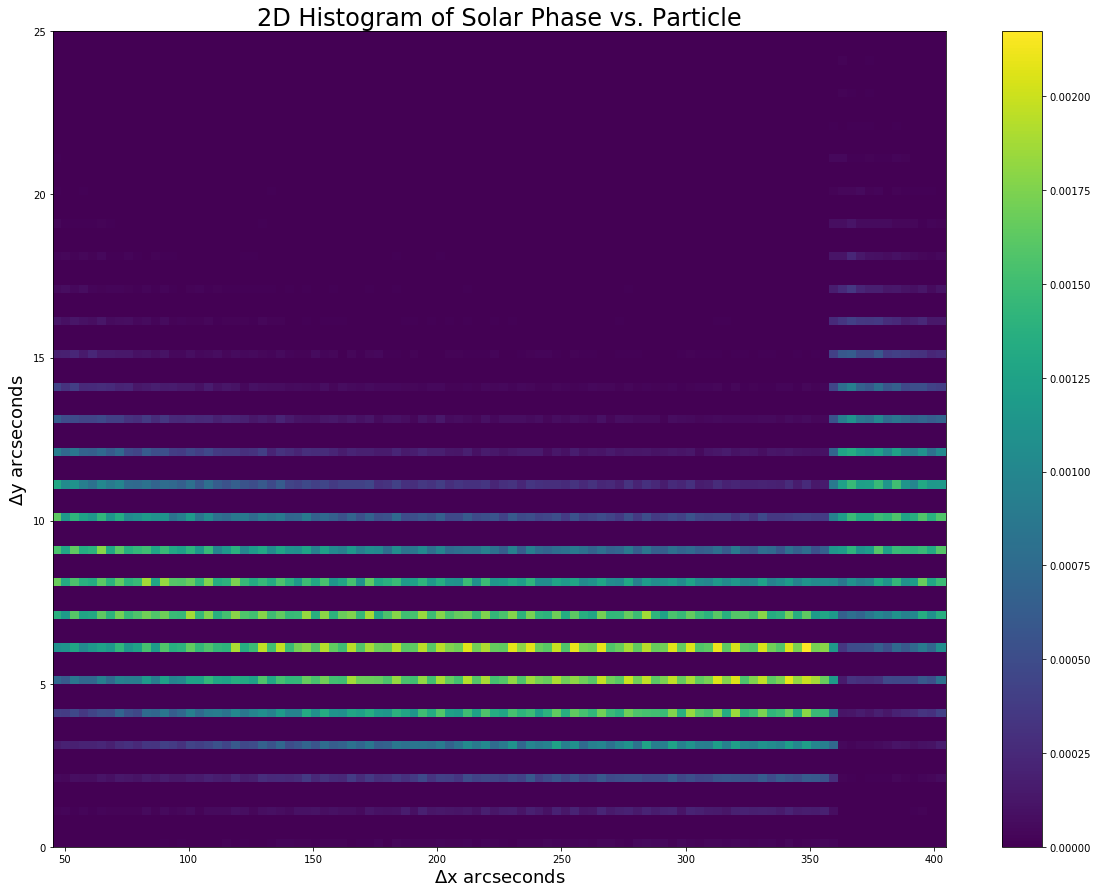

In [143]:
a = np.vstack((longitude, y1000))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=(100), density=True)
plt.title("2D Histogram of Solar Phase vs. Particle", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)